In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
df=  pd.read_csv('element_data.csv')

In [341]:
df.head()

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,83.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,70.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,130.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,528.0,0.765000,22650.0,0.000006


In [232]:
X= df['en_ghosh'].values

In [250]:
X

array([[0.1472165],
       [0.150078 ],
       [0.26137  ],
       [0.1511716],
       [0.25106  ],
       [0.1472068],
       [0.177911 ],
       [0.1440276],
       [0.25691  ],
       [0.1408379],
       [0.10277  ],
       [0.22119  ],
       [0.1586786],
       [0.1313053],
       [0.189935 ],
       [0.1392532],
       [0.105093 ],
       [0.1352844],
       [0.1312672],
       [0.093214 ],
       [0.1280782],
       [0.234581 ],
       [0.1273344],
       [0.2390504],
       [0.144986 ],
       [0.1154119],
       [0.1504066],
       [0.1432363],
       [0.20333  ],
       [0.212261 ],
       [0.1944   ],
       [0.229987 ],
       [0.207795 ],
       [0.22565  ],
       [0.121644 ],
       [0.2435164],
       [0.1193833],
       [0.198863 ],
       [0.1233637],
       [0.173447 ],
       [0.2167244],
       [0.1216986],
       [0.1551518]])

# Q1  • Develop a Linear Regression based model (see Tutorial 8) where electronegativity is X and boiling point is Y

In [233]:
from sklearn.linear_model import LinearRegression

In [240]:
class MyLR:
    def __init__(self):
        self.m=2
        self.b=3
        
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        # print(X_test)
          
        return self.m * X_test + self.b

In [266]:
lin = MyLR()
lin.fit(X,y)

[10150.29424497]
[1419.73020878]


In [251]:
X= df['en_ghosh'].values.reshape(-1, 1)
y= df['boiling_point'].values

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape

(76, 1)

In [267]:
slope = lin.m
print(slope)

[10150.29424497]


In [268]:
constant = lin.b
print(constant)

[1419.73020878]


In [269]:
y_Pred = lin.predict(X)

In [270]:
def plot_regression_line(x, y, y_pred):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="r", marker="p", s=None)

    # plotting the regression line
    plt.plot(x, y_pred, color="blue")

    # putting labels
    plt.xlabel('Electronegativity')
    plt.ylabel('boiling point')

    # function to show plot
    plt.show()


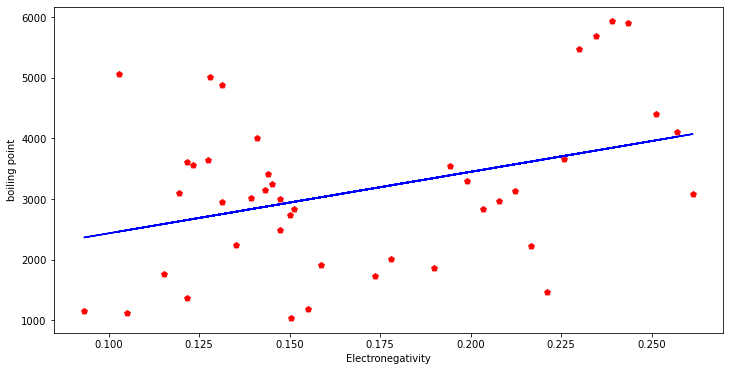

In [271]:
plt.figure(figsize=(12,6))
plot_regression_line(X,y,y_Pred)

# Q2 .Develop a MultiLinear Regression based model (see Tutorial 8) where electronegativity is X1 and density is X2 and Young’s modulus is Y .


In [272]:
X1 =  df['en_ghosh'].values

In [279]:
X2 = df['density_of_solid'].values

In [280]:
X_comb= np.array([X1, X2]).reshape(-1,2)

In [281]:
X_comb.shape

(43, 2)

In [282]:
y_young_M= df['youngs_modulus'].values

In [283]:
class Multiple_LR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [284]:
mlr=  Multiple_LR()

In [288]:
mlr.fit(X_comb,y_young_M)

In [289]:
y_pred_mlr = mlr.predict(X_comb)

In [290]:
mlr.coef_

array([-0.00493918,  0.00408519])

In [291]:
mlr.intercept_

135.69887081010828

In [295]:
df.head()

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,83.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,70.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,130.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,528.0,0.765000,22650.0,0.000006


In [292]:
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [296]:
fig = px.scatter_3d(df, x='en_ghosh', y='density_of_solid', z='youngs_modulus')

fig.show()

In [297]:
x1_range = np.linspace(df['en_ghosh'].min(), df['en_ghosh'].max(), 10)
x2_range = np.linspace(df['density_of_solid'].min(), df['density_of_solid'].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_mesh = mlr.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])
y_pred_mesh = y_pred_mesh.reshape(x1_mesh.shape)
fig.add_trace(go.Surface(x=x1_mesh, y=x2_mesh, z=y_pred_mesh, opacity=0.5))

# updating the plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Electronegativity',
                    yaxis_title='Density',
                    zaxis_title='Youngs Modulus'))

# showing the plot
fig.show()






# Q3 . A tutorial (Tutorial 10) for Gradient Descent was conducted on March 9, Thursday during the lecture hour. Can you use the Gradient Descent based model from this tutorial such that electronegativity is X1 and density is X2 and Young's Modulus is Y ? If yes, show the fitted line for this data. If not, modify the function gradient_descent in the Tutorial 10 and show the fitted line. Note that, you do not need to use Batch GD or Stocastic Gradient Descent because your data is very small.



In [298]:
X_comb.shape

(43, 2)

In [299]:
y_young_M.shape

(43,)

In [300]:
class GDregressor:
    def __init__(self,learning_rate=0.1,epochs=100):
        self.coef_= None
        self.intercept_ =None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init the  coefficients 
        self.intercept_ =0
        self.coef_ =np.ones(X_train.shape[1])
        
        
        for i in range(self.epochs):
            y_hat= np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2*np.mean(y_train-y_hat)
            self.intercept_ = self.intercept_ - (self.lr*intercept_der)
            
            coef_der=  - 2*np.dot((y_train-y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ -  (self.lr*coef_der)
        print(self.intercept_,self.coef_)
            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
        
            
            

In [316]:
gdr =GDregressor(epochs=50,learning_rate=0.000000002)

In [318]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_comb,y_young_M,test_size=0.2,random_state=2)
X_train.shape

(34, 2)

In [319]:
X_test.shape

(9, 2)

In [325]:
gdr.fit(X_train,y_train)

-8.129138837256283e-05 [0.00034476 0.0097026 ]


In [320]:
df.head()

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,83.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,70.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,130.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,528.0,0.765000,22650.0,0.000006


In [321]:
fig = px.scatter_3d(df, x='en_ghosh', y='density_of_solid', z='youngs_modulus')

fig.show()

In [326]:
x1_range = np.linspace(df['en_ghosh'].min(), df['en_ghosh'].max(), 10)
x2_range = np.linspace(df['density_of_solid'].min(), df['density_of_solid'].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_mesh = gdr.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])
y_pred_mesh = y_pred_mesh.reshape(x1_mesh.shape)
fig.add_trace(go.Surface(x=x1_mesh, y=x2_mesh, z=y_pred_mesh, opacity=0.5))

# updating the plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Electronegativity',
                    yaxis_title='Density',
                    zaxis_title='Youngs Modulus'))

# showing the plot
fig.show()





# Q4 .Use GD function from any library e.g. Numpy or Scikit learn and compare against the solution from Tutorial or your GD function

In [323]:
y_young_M.shape

(43,)

In [346]:
X_train.shape

(34, 2)

In [324]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [353]:
reg =  SGDRegressor(max_iter=10000, tol=1e-3)
reg.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()),      # ('sgdregressor', SGDRegressor())])

SGDRegressor(max_iter=10000)

In [354]:
reg.coef_

array([-8.30871052e+12, -4.34616007e+12])

In [355]:
reg.intercept_

array([3.91289514e+10])

In [356]:
reg.predict(X_test)

array([-6.98432109e+16, -1.45665518e+12, -2.57280144e+12, -1.83631334e+12,
       -2.68664023e+12, -1.11111499e+17, -1.83308384e+12, -8.93196073e+16,
       -2.02993709e+12])

In [330]:
df.head()

,atomic_number,atomic_volume,boiling_point,en_ghosh,evaporation_heat,heat_of_formation,lattice_constant,specific_heat,atomic_mass,atomic_radius,electrical_resistivity,molar_volume,bulk_modulus,youngs_modulus,average_ionic_radius,density_of_solid,coefficient_of_linear_thermal_expansion
0,47,10.30,2485.0,0.147217,254.1,284.9,4.09,0.237,107.868200,1.60,1.630000e-08,10.27,100.0,83.0,1.086667,10490.0,0.000019
1,13,10.00,2740.0,0.150078,284.1,330.9,4.05,0.900,26.981539,1.25,2.700000e-08,10.00,76.0,70.0,0.675000,2700.0,0.000023
2,79,10.20,3080.0,0.261370,340.0,368.2,4.08,0.129,196.966569,1.35,2.200000e-08,10.21,220.0,78.0,1.070000,19300.0,0.000014
3,29,7.10,2840.0,0.151172,304.6,337.4,3.61,0.385,63.546000,1.35,1.720000e-08,7.11,140.0,130.0,0.820000,8920.0,0.000017
4,77,8.54,4403.0,0.251060,604.0,669.0,3.84,0.133,192.217000,1.35,4.700000e-08,8.52,320.0,528.0,0.765000,22650.0,0.000006


In [357]:
# Comparing the plots obtained with my GD function 
x1_range1 = np.linspace(df['en_ghosh'].min(), df['en_ghosh'].max(), 10)
x2_range2 = np.linspace(df['density_of_solid'].min(), df['density_of_solid'].max(), 10)
x1_mesh1, x2_mesh2 = np.meshgrid(x1_range1, x2_range2)
y_pred_mesh_1 = reg.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])
y_pred_mesh_1 = y_pred_mesh.reshape(x1_mesh.shape)
fig.add_trace(go.Surface(x=x1_mesh, y=x2_mesh, z=y_pred_mesh_1, opacity=0.5))

# updating the plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Electronegativity',
                    yaxis_title='Density',
                    zaxis_title='Youngs MOdulus'))

# showing the plot
fig.show()
